In [1]:
# math & tables module
import numpy as np
import pandas as pd

# plotting module
from matplotlib import pyplot as plt
import seaborn as sns

# module to show version used in project
import session_info

# statistics module
from scipy import stats as st
import statsmodels.stats.proportion as sp

# pre-processing
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder

# class imbalance
from imblearn import under_sampling, over_sampling

# os operation
import os

In [2]:
# session module version
session_info.show()

In [3]:
# reading dataset
data = pd.read_csv("test.csv", sep=';')

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
data.shape[0]

4521

## Data Cleaning

### Handle Missing Values
from descriptive statistics shown that there are 4 column contain missing-values but not in form of null-values, however in form of value of 'unknown' & 'other' in 4 column named: *job, education, contact, poutcome*. ```poutcome``` are variable that having the most unknown value which consist of more than its 50% data, the best decision taken is to just take out and not use the variables..

#### Job Variable

In [6]:
# Handling missing values in job column using frequent values replacing method

data.job.value_counts().to_frame().T

job,management,blue-collar,technician,admin.,services,retired,self-employed,entrepreneur,unemployed,housemaid,student,unknown
count,969,946,768,478,417,230,183,168,128,112,84,38


In [7]:
# replacing the unknown values using the most values containing column (mode) which 'blue-collar'

data.job.replace(to_replace='unknown', value=data.job.mode()[0], inplace=True)
data.job.value_counts().to_frame().T

job,management,blue-collar,technician,admin.,services,retired,self-employed,entrepreneur,unemployed,housemaid,student
count,1007,946,768,478,417,230,183,168,128,112,84


After replacing with the mode value, the unknown which is the missing value have gone from the column

#### Education Variable

In [8]:
# Handling missing values in education column using frequent values replacing method

data.education.value_counts().to_frame().T

education,secondary,tertiary,primary,unknown
count,2306,1350,678,187


In [9]:
data.education.replace(to_replace='unknown', value=data.education.mode()[0], inplace=True)
data.education.value_counts().to_frame().T

education,secondary,tertiary,primary
count,2493,1350,678


After replacing with the mode value, the unknown which is the missing value have gone from the column

#### Contact Variable

In [10]:
# Handling missing values in contact column using frequent values replacing method

data.contact.value_counts().to_frame().T

contact,cellular,unknown,telephone
count,2896,1324,301


In [11]:
data.contact.replace(to_replace='unknown', value=data.contact.mode()[0], inplace=True)
data.contact.value_counts().to_frame().T

contact,cellular,telephone
count,4220,301


After replacing with the mode value, the unknown which is the missing value have gone from the column

#### Poutcome Variable

In [12]:
# handling the coloumn value named 'other' and change it to its mode value

data.poutcome.value_counts().to_frame().T

poutcome,unknown,failure,other,success
count,3705,490,197,129


In [13]:
# droping the column

data.drop(['poutcome'], axis=1, inplace=True)

# checking the column available after dropping for confirmation
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'y'],
      dtype='object')

Dengan pengecekan diatas didapatkan bahwa variabel ```poutcome``` telah dihapus

### Handle Duplicated Data
from the previous stage, shown that there are no duplication in dataset analyse from all column, so in this section there are no treatment needed to be done

In [14]:
# checking overall

data.duplicated().sum()

0

In [15]:
# checking for subset

data.duplicated(subset=['age','balance','day','campaign']).sum()

19

There are no duplication shown from the dataset analyse from all the column which shown there are no redundant data record in dataset

### Handle Outliers
for test data train, decided that there will be no outlier handling

In [16]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,no
3,30,management,married,tertiary,no,1476,yes,yes,cellular,3,jun,199,4,-1,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,cellular,5,may,226,1,-1,0,no


In [17]:
# numerical setelah feature selection
numerical = ['age','balance','duration','campaign']

In [18]:
data_num = data[numerical]
data_num.head()

,age,balance,duration,campaign
0,30,1787,79,1
1,33,4789,220,1
2,35,1350,185,1
3,30,1476,199,4
4,59,0,226,1


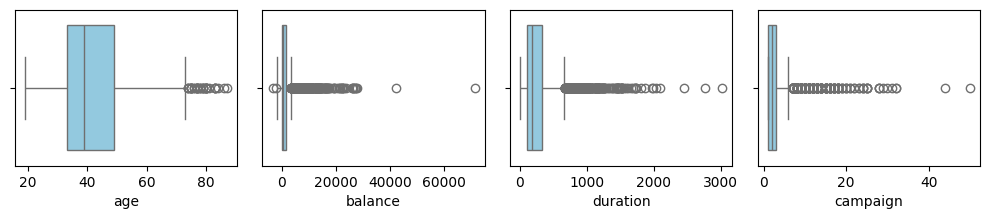

In [19]:
feature = numerical

plt.figure(figsize=(10,4))
for i in range(0, len(feature)):
    plt.subplot(2,4, i+1)
    sns.boxplot(x=data[feature[i]], color='skyblue')
    plt.xlabel(feature[i])
    plt.tight_layout()

### Feature Extraction

In [20]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,no
3,30,management,married,tertiary,no,1476,yes,yes,cellular,3,jun,199,4,-1,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,cellular,5,may,226,1,-1,0,no


#### Transforming ```previous``` variable into categorical so its usable

In [21]:
data.query("previous > 0").y.count()

816

In [22]:
data.previous = np.where(data.previous == 0, 0, 1)

In [23]:
data.previous.value_counts()

previous
0    3705
1     816
Name: count, dtype: int64

## Feature Engineering

### Feature Selection
Feature used in modelling are.
> age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, previous

Classification label
> y

In [24]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,1,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,no
3,30,management,married,tertiary,no,1476,yes,yes,cellular,3,jun,199,4,-1,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,cellular,5,may,226,1,-1,0,no


In [25]:
data.drop(['pdays'], axis=1, inplace=True)

In [26]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,1,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,cellular,3,jun,199,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,cellular,5,may,226,1,0,no


### Feature Encoding

In [27]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,1,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,cellular,3,jun,199,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,cellular,5,may,226,1,0,no


In [28]:
# after feature selection
category = ['job','marital','education','default','housing','loan','contact','month','y']
cat_ordinal = ['education','default','housing','loan','month','y']
cat_nominal = ['job','contact', 'marital']

#### label encoder categorical to numerical

In [29]:
mapping_month = {
    'jan' : 0,
    'feb' : 1,
    'mar' : 2,
    'apr' : 3,
    'may' : 4,
    'jun' : 5,
    'jul' : 6,
    'aug' : 7,
    'sep' : 8,
    'oct' : 9,
    'nov' : 10,
    'dec' : 11
}

data['month'] = data['month'].map(mapping_month)

In [30]:
mapping_education = {
    'primary'   : 0,
    'secondary' : 1, 
    'tertiary'  :2
}

data['education'] = data['education'].map(mapping_education)

In [31]:
mapping_default = {
    'yes' : 1,
    'no'  : 0
}

data['default'] = data['default'].map(mapping_default)

In [32]:
mapping_housing = {
    'yes' : 1,
    'no'  : 0
}

data['housing'] = data['housing'].map(mapping_housing)

In [33]:
mapping_loan = {
    'yes' : 1,
    'no'  : 0
}

data['loan'] = data['loan'].map(mapping_loan)

In [34]:
mapping_y = {
    'yes' : 1,
    'no'  : 0
}

data['y'] = data['y'].map(mapping_y)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   int64 
 4   default    4521 non-null   int64 
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   int64 
 7   loan       4521 non-null   int64 
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   int64 
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  previous   4521 non-null   int64 
 14  y          4521 non-null   int64 
dtypes: int64(12), object(3)
memory usage: 529.9+ KB


#### OHE categorical to numerical

In [36]:
data.reset_index(drop=True, inplace=True)

In [37]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
4516,33,services,married,1,0,-333,1,0,cellular,30,6,329,5,0,0
4517,57,self-employed,married,2,1,-3313,1,1,cellular,9,4,153,1,0,0
4518,57,technician,married,1,0,295,0,0,cellular,19,7,151,11,0,0
4519,28,blue-collar,married,1,0,1137,0,0,cellular,6,1,129,4,1,0
4520,44,entrepreneur,single,2,0,1136,1,1,cellular,3,3,345,2,1,0


##### Contact

In [38]:
data.contact.value_counts()

contact
cellular     4220
telephone     301
Name: count, dtype: int64

In [39]:
contact_ohe = pd.get_dummies(data['contact'],prefix='contact', dtype=int)
data = data.join(contact_ohe)

##### Marital

In [40]:
data.marital.value_counts()

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

In [41]:
marital_ohe = pd.get_dummies(data['marital'],prefix='marital', dtype=int)
data = data.join(marital_ohe)

##### Job

In [42]:
data.job.value_counts()

job
management       1007
blue-collar       946
technician        768
admin.            478
services          417
retired           230
self-employed     183
entrepreneur      168
unemployed        128
housemaid         112
student            84
Name: count, dtype: int64

In [43]:
job_ohe = pd.get_dummies(data['job'],prefix='job', dtype=int)
data = data.join(job_ohe)

In [44]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'previous',
       'y', 'contact_cellular', 'contact_telephone', 'marital_divorced',
       'marital_married', 'marital_single', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed'],
      dtype='object')

In [45]:
data.drop(['job','marital','contact'], axis=1, inplace=True)

In [46]:
data.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'previous', 'y', 'contact_cellular',
       'contact_telephone', 'marital_divorced', 'marital_married',
       'marital_single', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed'],
      dtype='object')

In [47]:
data.describe()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,...,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1.148640,0.016810,1422.657819,0.566025,0.152842,15.915284,5.166777,263.961292,2.793630,...,0.209246,0.037160,0.024773,0.222738,0.050874,0.040478,0.092236,0.018580,0.169874,0.028312
std,10.576211,0.653126,0.128575,3009.638142,0.495676,0.359875,8.247667,2.378380,259.856633,3.109807,...,0.406815,0.189174,0.155451,0.416130,0.219764,0.197099,0.289391,0.135051,0.375564,0.165882
min,19.000000,0.000000,0.000000,-3313.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,69.000000,0.000000,0.000000,9.000000,4.000000,104.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,0.000000,444.000000,1.000000,0.000000,16.000000,5.000000,185.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,2.000000,0.000000,1480.000000,1.000000,0.000000,21.000000,7.000000,329.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,87.000000,2.000000,1.000000,71188.000000,1.000000,1.000000,31.000000,11.000000,3025.000000,50.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Transformation 

In [48]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

data.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,previous,y,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,30,0,0,1787,0,0,19,9,79,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,33,1,0,4789,1,1,11,4,220,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,35,2,0,1350,1,0,16,3,185,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,30,2,0,1476,1,1,3,5,199,4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,59,1,0,0,1,0,5,4,226,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                4521 non-null   int64
 1   education          4521 non-null   int64
 2   default            4521 non-null   int64
 3   balance            4521 non-null   int64
 4   housing            4521 non-null   int64
 5   loan               4521 non-null   int64
 6   day                4521 non-null   int64
 7   month              4521 non-null   int64
 8   duration           4521 non-null   int64
 9   campaign           4521 non-null   int64
 10  previous           4521 non-null   int64
 11  y                  4521 non-null   int64
 12  contact_cellular   4521 non-null   int64
 13  contact_telephone  4521 non-null   int64
 14  marital_divorced   4521 non-null   int64
 15  marital_married    4521 non-null   int64
 16  marital_single     4521 non-null   int64
 17  job_admin.    

In [50]:
data[numerical].columns

Index(['age', 'balance', 'duration', 'campaign'], dtype='object')

In [51]:
# numerical scalling
data.loc[:,['age']] = StandardScaler().fit_transform(data['age'].values.reshape(len(data),1))
data.loc[:,['campaign']] = StandardScaler().fit_transform(data['campaign'].values.reshape(len(data),1))
data.loc[:,['balance']] = StandardScaler().fit_transform(data['balance'].values.reshape(len(data),1))
data.loc[:,['duration']] = StandardScaler().fit_transform(data['duration'].values.reshape(len(data),1))
data.loc[:,['day']] = StandardScaler().fit_transform(data['age'].values.reshape(len(data),1))

In [52]:
cat_ordinal = ['education, month']

In [53]:
# categorical ordinal more than 2 value scalling
data.loc[:,['education']] = StandardScaler().fit_transform(data['education'].values.reshape(len(data),1))
data.loc[:,['month']] = StandardScaler().fit_transform(data['month'].values.reshape(len(data),1))

In [54]:
data.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,previous,y,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,-1.056270,-1.758874,0,0.121072,0,0,-1.056270,1.611873,-0.711861,-0.576829,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.772583,-0.227607,0,1.118644,1,1,-0.772583,-0.490631,-0.169194,-0.576829,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,-0.583458,1.303660,0,-0.024144,1,0,-0.583458,-0.911131,-0.303898,-0.576829,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,-1.056270,1.303660,0,0.017726,1,1,-1.056270,-0.070130,-0.250017,0.387967,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,1.686036,-0.227607,0,-0.472753,1,0,1.686036,-0.490631,-0.146102,-0.576829,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [55]:
data.describe()

,age,education,default,balance,housing,loan,day,month,duration,campaign,previous,y,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
count,4.521000e+03,4.521000e+03,4521.000000,4.521000e+03,4521.000000,4521.000000,4.521000e+03,4.521000e+03,4.521000e+03,4.521000e+03,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,-1.178737e-16,-6.758093e-17,0.016810,-1.571649e-17,0.566025,0.152842,2.828969e-17,4.400619e-17,-7.622500e-17,-6.286598e-18,0.180491,0.115240,0.933422,0.066578,0.116788,0.618668,0.264543,0.105729,0.209246,0.037160,0.024773,0.222738,0.050874,0.040478,0.092236,0.018580,0.169874,0.028312
std,1.000111e+00,1.000111e+00,0.128575,1.000111e+00,0.495676,0.359875,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,0.384638,0.319347,0.249318,0.249318,0.321203,0.485767,0.441138,0.307524,0.406815,0.189174,0.155451,0.416130,0.219764,0.197099,0.289391,0.135051,0.375564,0.165882
min,-2.096455e+00,-1.758874e+00,0.000000,-1.573671e+00,0.000000,0.000000,-2.096455e+00,-2.172634e+00,-1.000513e+00,-5.768295e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.725828e-01,-2.276070e-01,0.000000,-4.498240e-01,0.000000,0.000000,-7.725828e-01,-4.906307e-01,-6.156433e-01,-5.768295e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.052091e-01,-2.276070e-01,0.000000,-3.252105e-01,1.000000,0.000000,-2.052091e-01,-7.012996e-02,-3.038984e-01,-2.552305e-01,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.404137e-01,1.303660e+00,0.000000,1.905496e-02,1.000000,0.000000,7.404137e-01,7.708715e-01,2.503146e-01,6.636847e-02,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.333780e+00,1.303660e+00,1.000000,2.318321e+01,1.000000,1.000000,4.333780e+00,2.452874e+00,1.062641e+01,1.518152e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


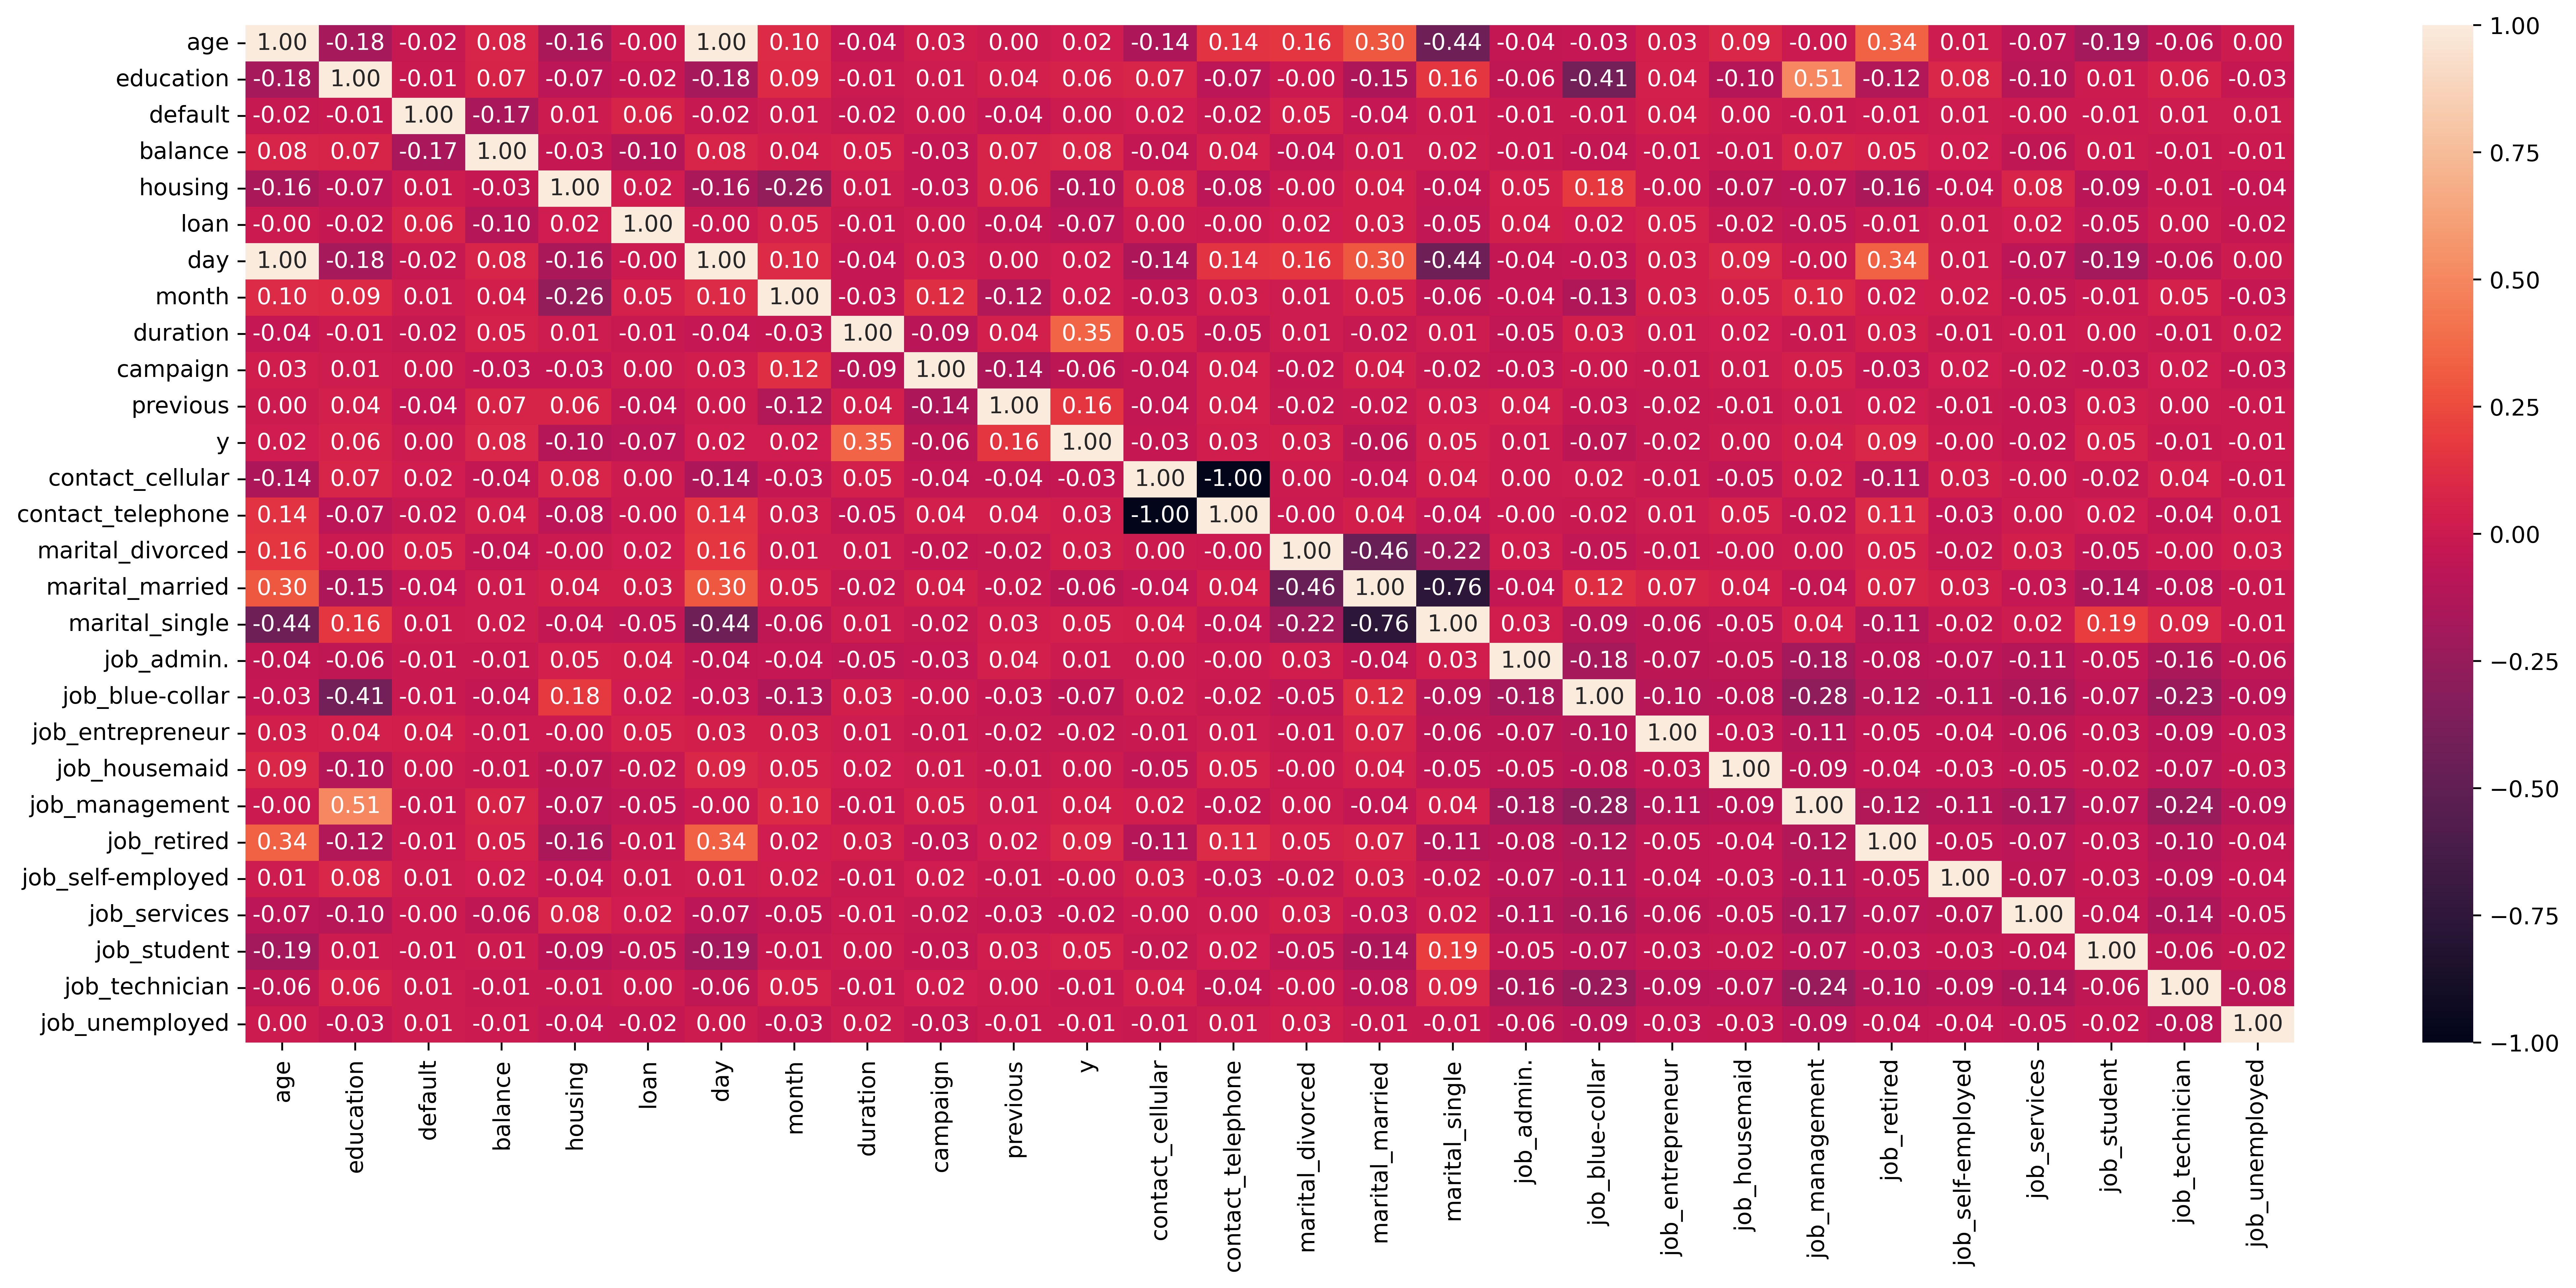

In [56]:
plt.figure(figsize=(20,8), dpi =500)
sns.heatmap(data.corr(method='spearman'), annot=True, fmt='.2f')
plt.show()

### Class Imbalance

No treatment done in this section because test data supposedly goes by random and its normal for its to be unbalance

In [57]:
# categorising feature & label
feature = ['age','education','default','balance','housing','loan','day','month','duration','campaign','previous',
          'contact_cellular','contact_telephone','marital_divorced','marital_married','marital_single',
          'job_admin.','job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_retired','job_self-employed',
          'job_services','job_student','job_technician','job_unemployed']
label = ['y']

In [58]:
# splitting the feature & labels to 2 variabels
X = data[feature]
y = data['y'].values

In [59]:
# checking data count

print(X.shape)
print(y.shape)

(4521, 27)
(4521,)


In [60]:
# checking are there any imbalance? yes there are, so SMOTE action gonna be applied

pd.Series(y).value_counts()

0    4000
1     521
Name: count, dtype: int64

### Exporting clean train Dataframe

In [62]:
cwd = os.getcwd()
path = cwd + "/output/test.csv"
data.to_csv(path, encoding='utf-8', index=False)